In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

# Exploratory data analysis 

1. Importing the Dataset:

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('yulu_data.csv')

# Display the first few rows of the dataset to get a glimpse of the data
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


2. Checking the Structure & Characteristics:
    - Dataset Shape:

In [3]:
# Check data types of columns
print("Data Types:")
print(df.dtypes)

Data Types:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


- Data Types:

In [4]:
# Check data types of columns
print("Data Types:")
print(df.dtypes)

Data Types:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


- Missing Values:

In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


- Statistical Summary:

In [6]:
# Get a statistical summary of numerical columns
print("Statistical Summary:")
df.describe()

Statistical Summary:


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- Distribution Plots for Numerical Variables:

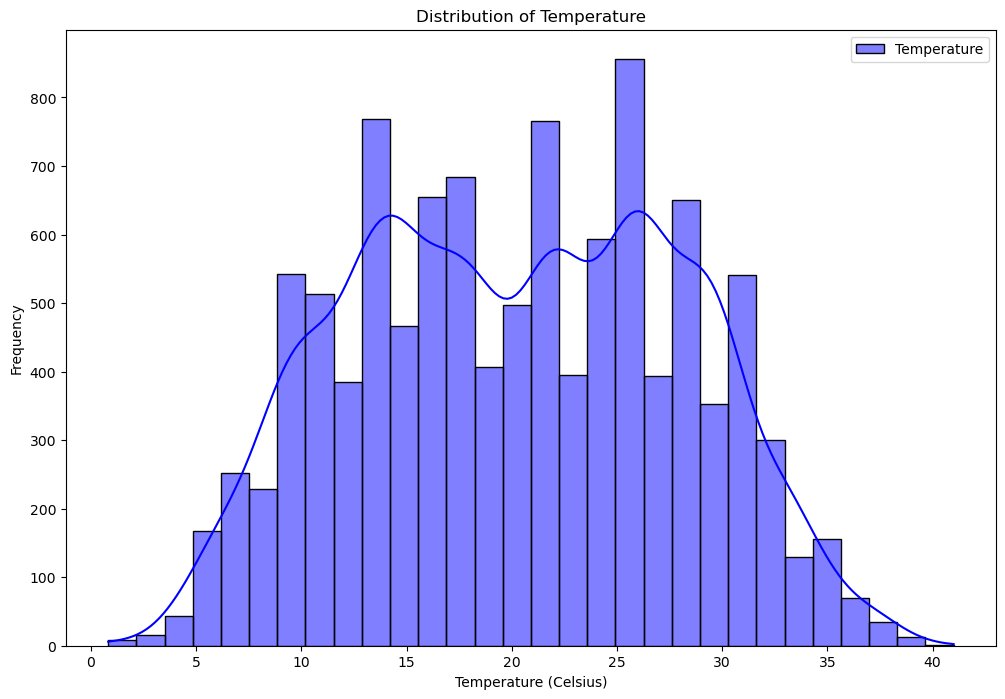

In [7]:
# Create distribution plots for numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(df['temp'], bins=30, kde=True, color='blue', label='Temperature')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- Bar Plots for Categorical Variables:

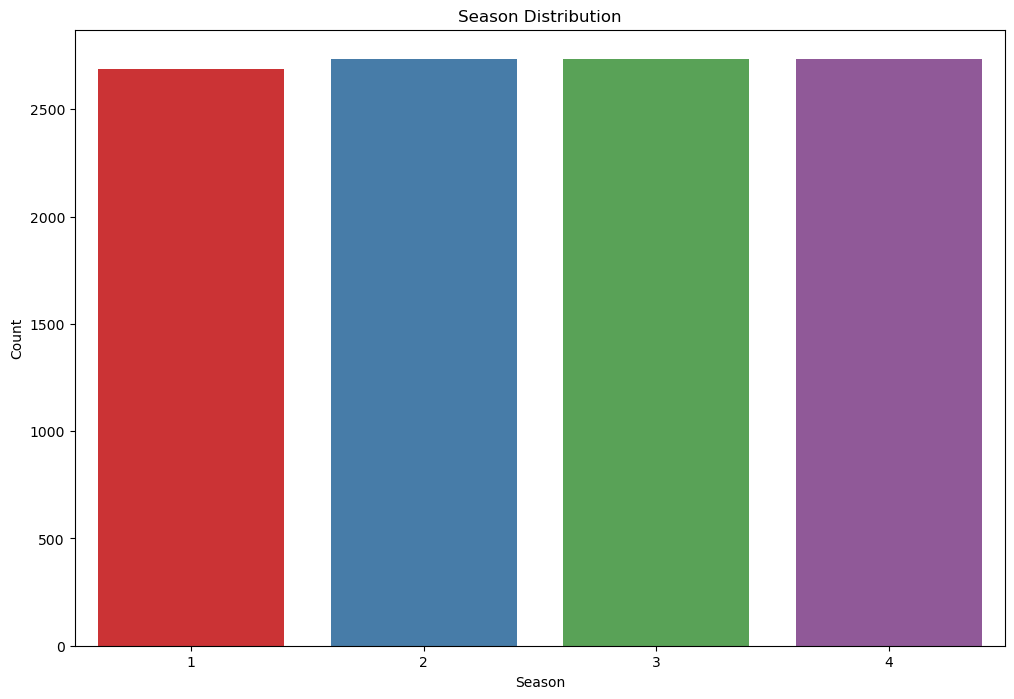

In [8]:
# Create bar plots for categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='season', palette='Set1')
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Relation between the dependent and independent variable:

1. Relation with Workingday (Categorical Variable):

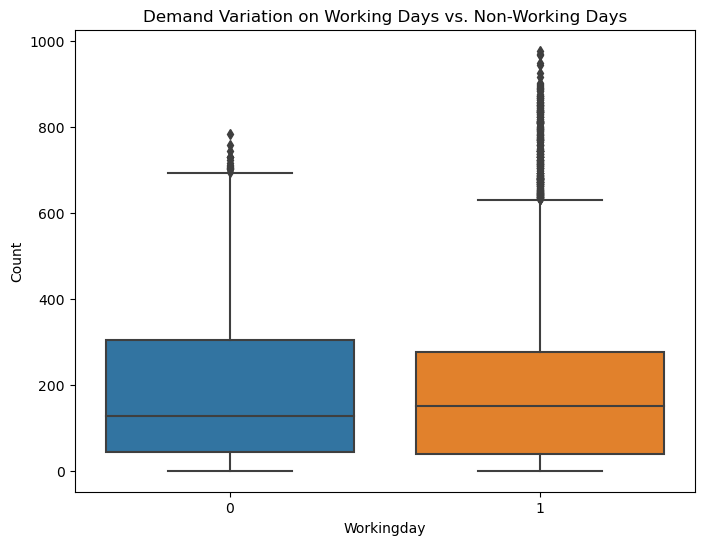

In [9]:
# Boxplot for Count vs. Workingday
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='workingday', y='count')
plt.title('Demand Variation on Working Days vs. Non-Working Days')
plt.xlabel('Workingday')
plt.ylabel('Count')
plt.show()

- t-test to formally test whether the means of the "Count" variable are significantly different between working days and non-working days

In [10]:
workingday0 = df[df['workingday'] == 0]['count']
workingday1 = df[df['workingday'] == 1]['count']

t_stat, p_value = ttest_ind(workingday0, workingday1)

print("2-Sample T-Test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

2-Sample T-Test Results:
t-statistic: -1.2096277376026694
p-value: 0.22644804226361348


2. Relation with Weather (Categorical Variable):

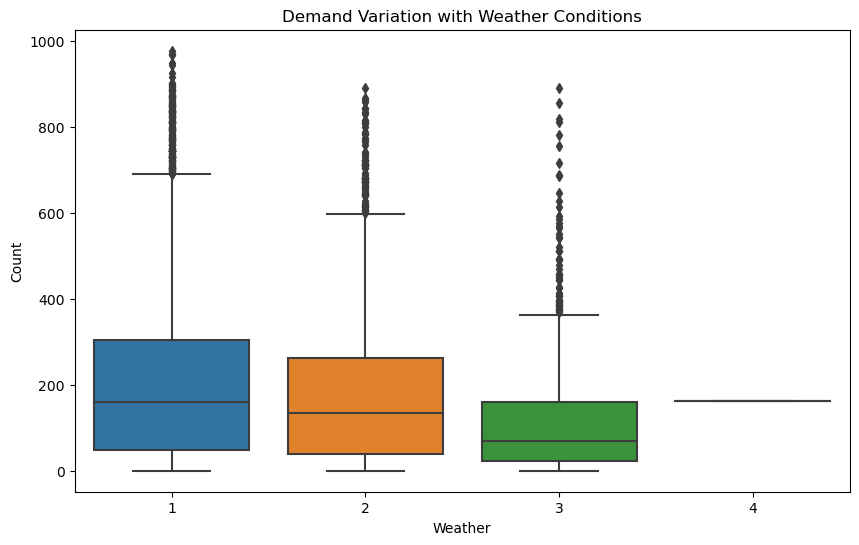

In [11]:
# Boxplot for Count vs. Weather
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather', y='count')
plt.title('Demand Variation with Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

In [12]:
weather_groups = [df[df['weather'] == i]['count'] for i in df['weather'].unique()]
f_stat, p_value = f_oneway(*weather_groups)

print("ANOVA Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

ANOVA Results:
F-statistic: 65.53024112793271
p-value: 5.482069475935669e-42


3. Relation with Season (Categorical Variable):

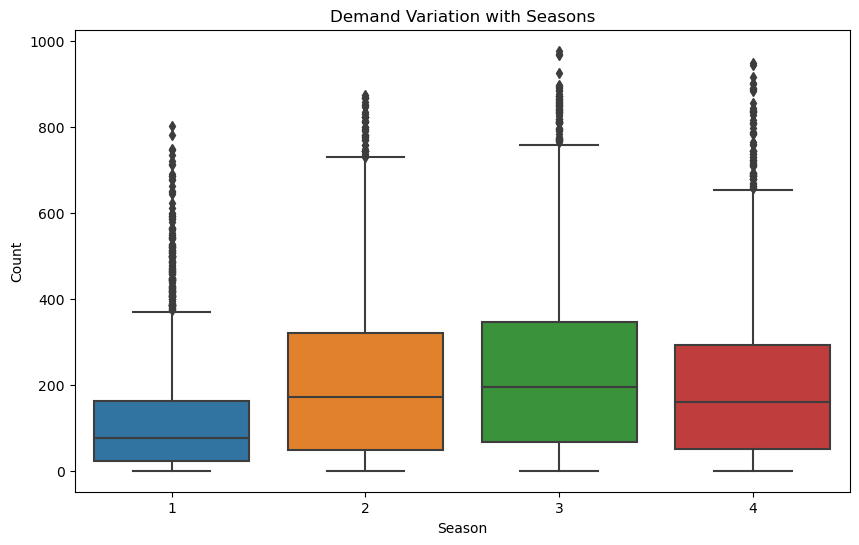

In [13]:
# Boxplot for Count vs. Season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='count')
plt.title('Demand Variation with Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

- To formally test for differences in demand across seasons, you can also use ANOVA:

In [14]:
season_groups = [df[df['season'] == i]['count'] for i in df['season'].unique()]
f_stat_season, p_value_season = f_oneway(*season_groups)

print("ANOVA Results (Seasons):")
print("F-statistic:", f_stat_season)
print("p-value:", p_value_season)

ANOVA Results (Seasons):
F-statistic: 236.94671081032106
p-value: 6.164843386499654e-149


#### 1. Working Day Effect on the Number of Electric Cycles Rented:

    Appropriate Test: Two-Sample T-Test
    Hypothesis:
        Null Hypothesis (H0): There is no significant difference in the number of electric cycles rented between working days and non-working days.
        Alternative Hypothesis (H1): There is a significant difference in the number of electric cycles rented between working days and non-working days.

#### 2. Difference in the Number of Cycles Rented Across Different Seasons:

    Appropriate Test: Analysis of Variance (ANOVA)
    Hypothesis:
        Null Hypothesis (H0): The number of cycles rented is the same across all seasons (spring, summer, fall, winter).
        Alternative Hypothesis (H1): The number of cycles rented varies significantly across seasons.

#### 3. Difference in the Number of Cycles Rented Across Different Weather Conditions:

    Appropriate Test: Analysis of Variance (ANOVA)
    Hypothesis:
        Null Hypothesis (H0): The number of cycles rented is the same across all weather conditions.
        Alternative Hypothesis (H1): The number of cycles rented varies significantly across weather conditions.

#### 4. Dependency of Weather on Season (Chi-Square Test):

    Appropriate Test: Chi-Square Test for Independence
    Hypothesis:
        Null Hypothesis (H0): Weather and season are independent (no relationship).
        Alternative Hypothesis (H1): Weather and season are dependent (there is a relationship).

For the Chi-Square Test, you will need to create a contingency table to compare the observed frequencies of weather and season to the expected frequencies under the assumption of independence. If the chi-square test results in a significant p-value, it suggests that there is a relationship between weather and season.

Making sure to set significance level (alpha) before conducting these tests, typically at 0.05. After performing these tests, analyze the p-values to determine whether to reject or fail to reject the null hypotheses, and draw conclusions based on the results.

#### 1. Working Day Effect on the Number of Electric Cycles Rented (Two-Sample T-Test):

    Null Hypothesis (H0): There is no significant difference in the number of electric cycles rented between working days and non-working days.

#### 2. Difference in the Number of Cycles Rented Across Different Seasons (ANOVA):

    Null Hypothesis (H0): The number of cycles rented is the same across all seasons (spring, summer, fall, winter).

#### 3. Difference in the Number of Cycles Rented Across Different Weather Conditions (ANOVA):

    Null Hypothesis (H0): The number of cycles rented is the same across all weather conditions.

#### 4. Dependency of Weather on Season (Chi-Square Test for Independence):

    Null Hypothesis (H0): Weather and season are independent (there is no relationship between them).

#### 1. Working Day Effect on the Number of Electric Cycles Rented (Two-Sample T-Test):
   - Alternative Hypothesis (H1): There is a significant difference in the number of electric cycles rented between working days and non-working days.

#### 2. Difference in the Number of Cycles Rented Across Different Seasons (ANOVA):
   - Alternative Hypothesis (H1): The number of cycles rented varies significantly across seasons (spring, summer, fall, winter).

#### 3. Difference in the Number of Cycles Rented Across Different Weather Conditions (ANOVA):
   - Alternative Hypothesis (H1): The number of cycles rented varies significantly across weather conditions.

#### 4. Dependency of Weather on Season (Chi-Square Test for Independence):
   - Alternative Hypothesis (H1): Weather and season are dependent (there is a relationship between them).

These alternative hypotheses represent the claims that you are testing for significance. In hypothesis testing, you evaluate the evidence in the data to determine whether there is enough support to reject the null hypothesis in favor of the alternative hypothesis. The significance level (alpha) you choose will determine the threshold for determining whether the data provides sufficient evidence to support the alternative hypotheses.

Certainly, checking the assumptions of the statistical tests is an important step in hypothesis testing. Let's go through each test and its associated assumptions, including normality and equal variance, and how to check them:

#### 1. Working Day Effect on the Number of Electric Cycles Rented (Two-Sample T-Test):**

   - Assumption 1: **Normality** of Data
     - You can visually check the normality assumption using a histogram and a Q-Q plot. Additionally, you can use the Shapiro-Wilk test for a formal assessment. If the data is not perfectly normal but not severely skewed or has extreme outliers, the t-test can still be robust.

#### 2. Difference in the Number of Cycles Rented Across Different Seasons (ANOVA):**

   - Assumption 1: **Normality** of Data
     - Check the normality assumption for each season's data using histograms, Q-Q plots, or the Shapiro-Wilk test.

   - Assumption 2: **Equal Variance (Homoscedasticity)**
     - You can visually check equal variance by creating boxplots for each season's data. Additionally, you can perform Levene's test for formal assessment.

#### 3. Difference in the Number of Cycles Rented Across Different Weather Conditions (ANOVA):**

   - Assumption 1: **Normality** of Data
     - Check the normality assumption for each weather condition's data using histograms, Q-Q plots, or the Shapiro-Wilk test.

   - Assumption 2: **Equal Variance (Homoscedasticity)**
     - You can visually check equal variance by creating boxplots for each weather condition's data. Additionally, you can perform Levene's test for formal assessment.

#### 4. Dependency of Weather on Season (Chi-Square Test for Independence):**

   - Assumption 1: **Independence**
     - The chi-square test assumes that the observations are independent.

To address the assumptions:

- If normality assumptions fail (based on both visual inspection and statistical tests like Shapiro-Wilk), you can consider non-parametric alternatives or transformations of the data if appropriate.
- If equal variance (homoscedasticity) assumptions fail (based on visual inspection or Levene's test), you can consider Welch's ANOVA or non-parametric alternatives.

It's important to mention whether the assumptions were met or violated and how you proceeded with the analysis in your report. Additionally, provide visualizations to support your assessment of assumptions. Violation of assumptions may affect the interpretation of the test results, so it's essential to address them appropriately.

Working Day Effect on the Number of Electric Cycles Rented (Two-Sample T-Test)

In [15]:
# Perform the 2-sample t-test
t_stat, p_value = ttest_ind(workingday0, workingday1)

print(f"p_value < alpha: {p_value<0.05}")
print("fail to reject the null hypothesis with p_value :",p_value)

# Decision:

#     If p_value < alpha, reject the null hypothesis.
#     If p_value >= alpha, fail to reject the null hypothesis.

# Inference:

#     If the null hypothesis is rejected, you can conclude that there is a significant 
#    difference in the number of electric cycles rented between working days and non-working days.

p_value < alpha: False
fail to reject the null hypothesis with p_value : 0.22644804226361348


In [16]:
# Perform ANOVA
f_stat, p_value_season = f_oneway(*season_groups)

print(f"p_value_weather < alpha: {p_value_season<0.05}")
print("reject the null hypothesis with p_value_weather :",p_value_weather)

# Decision:

#     If p_value_season < alpha, reject the null hypothesis.
#     If p_value_season >= alpha, fail to reject the null hypothesis.

# Inference:

#     If the null hypothesis is rejected, you can conclude that the number of 
#     cycles rented varies significantly across seasons.

p_value_weather < alpha: True


NameError: name 'p_value_weather' is not defined

Difference in the Number of Cycles Rented Across Different Weather Conditions (ANOVA):

In [ ]:
# Perform ANOVA
f_stat_weather, p_value_weather = f_oneway(*weather_groups)

print(f"p_value_weather < alpha: {p_value_chi2<0.05}")
print("reject the null hypothesis with p_value_weather :",p_value_weather)

# Decision:

#     If p_value_weather < alpha, reject the null hypothesis.
#     If p_value_weather >= alpha, fail to reject the null hypothesis.

# Inference:

#     If the null hypothesis is rejected, you can conclude that the number of cycles rented 
#     varies significantly across weather conditions.

 Dependency of Weather on Season (Chi-Square Test for Independence):

In [ ]:
# Significance Level (Alpha): Set a significance level (e.g., alpha = 0.05).

# Create a contingency table for weather and season
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform chi-square test
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)

print(f"p_value_chi2 < alpha: {p_value_chi2<0.05}")
print("reject the null hypothesis with p_value_chi2 :",p_value_chi2)

# Decision:

#     If p_value_chi2 < alpha, reject the null hypothesis.
#     If p_value_chi2 >= alpha, fail to reject the null hypothesis.

# Inference:

#     If the null hypothesis is rejected, 
#     you can conclude that there is a significant relationship between weather and season.